# 911 Calls Project

For this capstone project 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert) will be analyzed. The data is 911 calls for Montgomery County, PA. <br> The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)

Just go along with this notebook and try to complete the instructions or answer the questions in bold using your Python and Data Science skills!

____
Importing the needed libraries and then the dataset.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')

In [2]:
df = pd.read_csv('911.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [4]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


## A Quick look at some of the data

Top 10 zipcodes for 911 calls

In [55]:
df['zip'].value_counts().head(10)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
19002.0    3050
19468.0    2990
19454.0    2781
19090.0    2635
19038.0    2578
Name: zip, dtype: int64

Top 10 townships for 911 calls

In [56]:
df['twp'].value_counts().head(10)

LOWER MERION        8443
ABINGTON            5977
NORRISTOWN          5890
UPPER MERION        5227
CHELTENHAM          4575
POTTSTOWN           4146
UPPER MORELAND      3434
LOWER PROVIDENCE    3225
PLYMOUTH            3158
HORSHAM             3003
Name: twp, dtype: int64

Number of unique townships in the data

In [19]:
df['twp'].nunique()

68

Below is a column will be created that will tell the reason for the call.
There is a reason in the beginning part of the title column

In [8]:
df['title']

0             EMS: BACK PAINS/INJURY
1            EMS: DIABETIC EMERGENCY
2                Fire: GAS-ODOR/LEAK
3             EMS: CARDIAC EMERGENCY
4                     EMS: DIZZINESS
                    ...             
99487    Traffic: VEHICLE ACCIDENT -
99488    Traffic: VEHICLE ACCIDENT -
99489               EMS: FALL VICTIM
99490           EMS: NAUSEA/VOMITING
99491    Traffic: VEHICLE ACCIDENT -
Name: title, Length: 99492, dtype: object

In [9]:
df['reason'] = df['title'].apply(lambda x: x.split(':')[0])

In [10]:
df['reason']

0            EMS
1            EMS
2           Fire
3            EMS
4            EMS
          ...   
99487    Traffic
99488    Traffic
99489        EMS
99490        EMS
99491    Traffic
Name: reason, Length: 99492, dtype: object

Below is the amout of calls and the reason for them

In [11]:
df['reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: reason, dtype: int64

The reason the call happened mapped

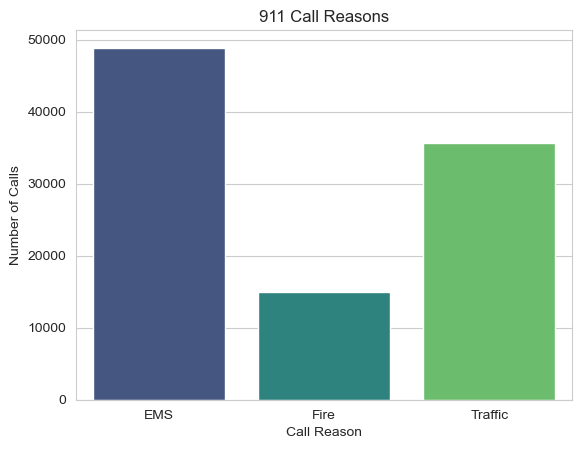

In [83]:
sns.countplot(x='reason',data=df, palette = 'viridis')
plt.xlabel('Call Reason')
plt.ylabel('Number of Calls')
plt.title('911 Call Reasons')
plt.show()

___
Now the time information will be examined and visualized.

In [60]:
type(df['timeStamp'][0])

pandas._libs.tslibs.timestamps.Timestamp

Converting the column from strings to DateTime objects

In [65]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [88]:
df['timeStamp'].min()

Timestamp('2015-12-10 17:40:00')

In [89]:
df['timeStamp'].max()

Timestamp('2016-08-24 11:17:02')

Now more columns will be added to account for the hour the call was made, the month the call was made in, and the day of the week the call happened.

In [15]:
df['hour'] = df['timeStamp'].apply(lambda row: row.hour)
df['month'] = df['timeStamp'].apply(lambda row: row.month)
df['dayOfWeek'] = df['timeStamp'].apply(lambda row: row.day_name())

In [16]:
df[['hour','dayOfWeek','month','timeStamp']]

,hour,dayOfWeek,month,timeStamp
0,17,Thursday,12,2015-12-10 17:40:00
1,17,Thursday,12,2015-12-10 17:40:00
2,17,Thursday,12,2015-12-10 17:40:00
3,17,Thursday,12,2015-12-10 17:40:01
4,17,Thursday,12,2015-12-10 17:40:01
...,...,...,...,...
99487,11,Wednesday,8,2016-08-24 11:06:00
99488,11,Wednesday,8,2016-08-24 11:07:02
99489,11,Wednesday,8,2016-08-24 11:12:00
99490,11,Wednesday,8,2016-08-24 11:17:01


Now with those columns added the number of calls that happened can be plotted

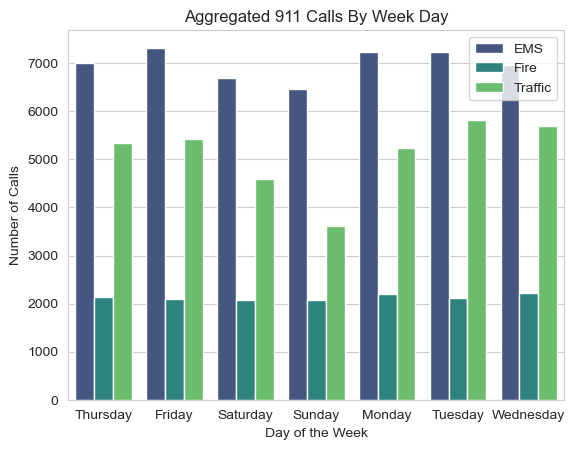

In [69]:
sns.countplot(data=df,x='dayOfWeek',hue='reason',palette='viridis')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Calls')
plt.title('Aggregated 911 Calls By Week Day')
plt.legend()
plt.show()

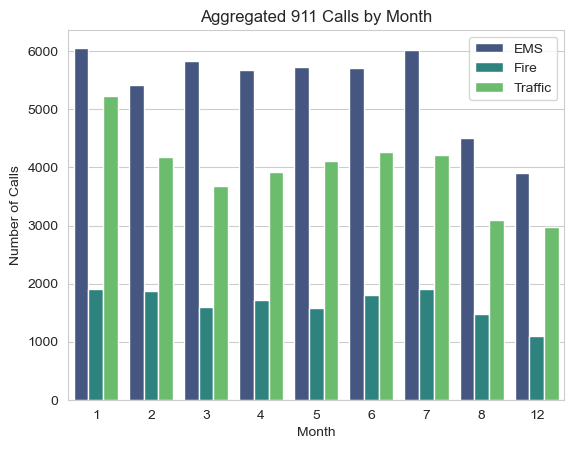

In [70]:
sns.countplot(data=df,x='month',hue='reason',palette='viridis')
plt.xlabel('Month')
plt.ylabel('Number of Calls')
plt.title('Aggregated 911 Calls by Month')
plt.legend()
plt.show()

____
Creating a new column for the date, it will contain yyyy-mm-dd of the call.

In [30]:
df['date'] = df['timeStamp'].apply(lambda row: row.date())

In [31]:
df['date']

0        2015-12-10
1        2015-12-10
2        2015-12-10
3        2015-12-10
4        2015-12-10
            ...    
99487    2016-08-24
99488    2016-08-24
99489    2016-08-24
99490    2016-08-24
99491    2016-08-24
Name: date, Length: 99492, dtype: object

New the amount of calls that happen a day will be grouped together so that calls per day can be analized

In [71]:
datecount = df.groupby('date').count()
datecount

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,month,dayOfWeek
date,,,,,,,,,,,,,
2015-12-10,115,115,115,100,115,115,115,113,115,115,115,115,115
2015-12-11,396,396,396,333,396,396,395,391,396,396,396,396,396
2015-12-12,403,403,403,333,403,403,403,401,403,403,403,403,403
2015-12-13,319,319,319,280,319,319,319,317,319,319,319,319,319
2015-12-14,447,447,447,387,447,447,446,445,447,447,447,447,447
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-08-20,328,328,328,279,328,328,328,327,328,328,328,328,328
2016-08-21,357,357,357,299,357,357,357,352,357,357,357,357,357
2016-08-22,389,389,389,336,389,389,388,384,389,389,389,389,389


Now to Visualize the calls per day.

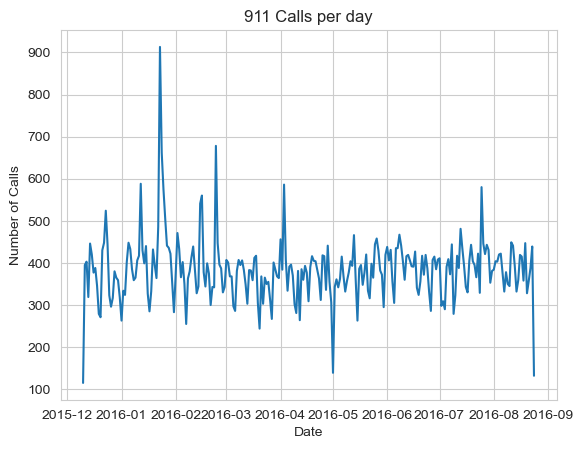

In [72]:
sns.lineplot(data=datecount,x='date',y='twp')
plt.xlabel('Date')
plt.ylabel('Number of Calls')
plt.title('911 Calls per Day')
plt.show()

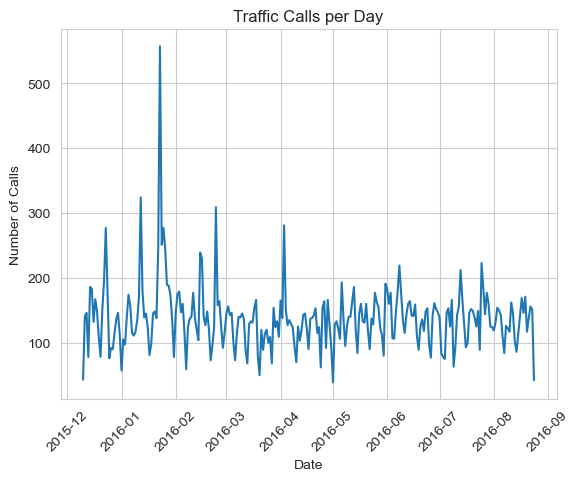

In [90]:
reascount = df[df['reason']=='Traffic'].groupby('date').count()
sns.lineplot(data=reascount,x='date',y='twp')
plt.xlabel('Date')
plt.ylabel('Number of Calls')
plt.title('Traffic Calls per Day')
plt.xticks(rotation=45, ha='center')
plt.show()

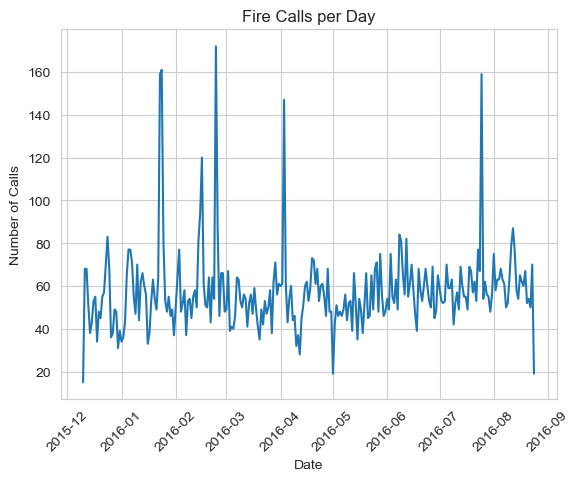

In [92]:
reascount = df[df['reason']=='Fire'].groupby('date').count()
sns.lineplot(data=reascount,x='date',y='twp')
plt.xlabel('Date')
plt.ylabel('Number of Calls')
plt.title('Fire Calls per Day')
plt.xticks(rotation=45, ha='center')
plt.show()

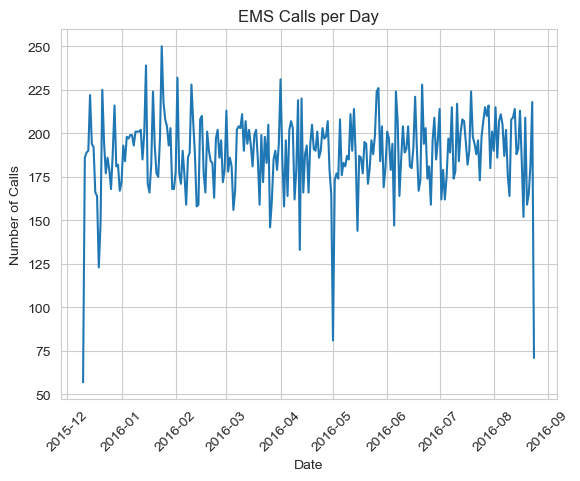

In [91]:
reascount = df[df['reason']=='EMS'].groupby('date').count()
sns.lineplot(data=reascount,x='date',y='twp')
plt.xlabel('Date')
plt.ylabel('Number of Calls')
plt.title('EMS Calls per Day')
plt.xticks(rotation=45, ha='center')
plt.show()

____
Now a heatmap will be made to visualize the aggregated hourly calls per day of week.

First a new data frame will be created. this data frame will be an aggregation of the day of the week and the hour the call of made.

In [48]:
daytime = df.groupby(by=['dayOfWeek','hour']).count()['reason'].unstack()
daytime

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
dayOfWeek,,,,,,,,,,,,,,,,,,,,,
Friday,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Monday,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Saturday,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sunday,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thursday,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354
Tuesday,269,240,186,170,209,239,415,655,889,880,...,943,938,1026,1019,905,731,647,571,462,274
Wednesday,250,216,189,209,156,255,410,701,875,808,...,904,867,990,1037,894,686,668,575,490,335


Now that data frame will be used to create a heatmap

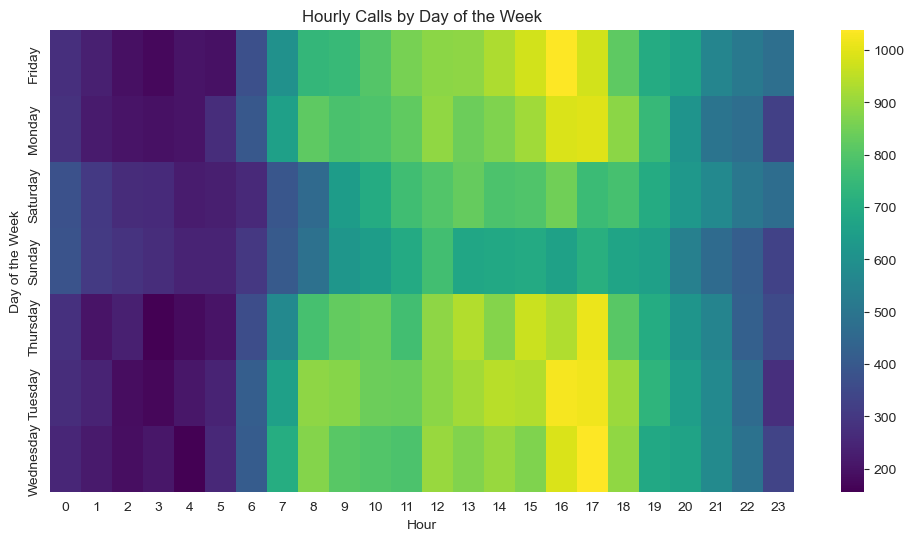

In [80]:
plt.figure(figsize=(12,6))
sns.heatmap(data=daytime,cmap='viridis')
plt.xlabel('Hour')
plt.ylabel('Day of the Week')
plt.title('Hourly Calls by Day of the Week')
plt.show()

____
now a heatmap for the reason of the calls will be created

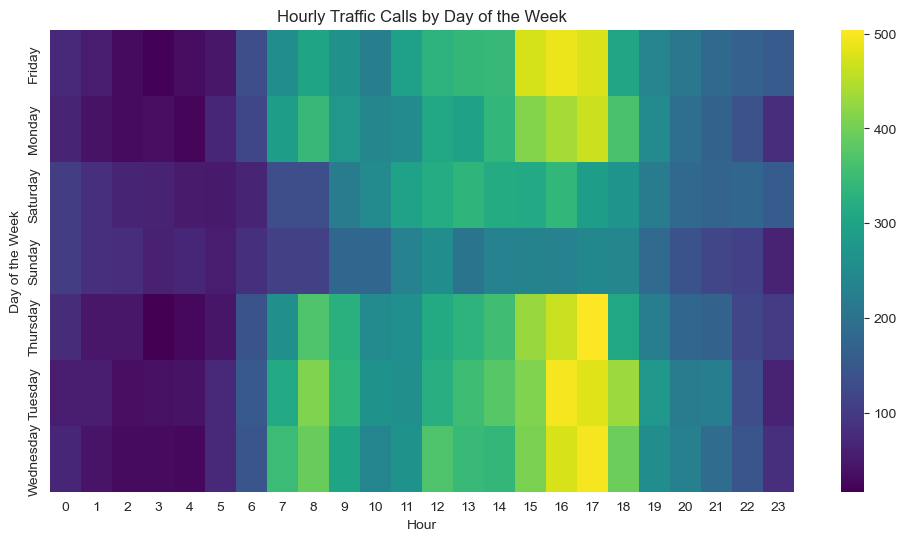

In [95]:
daytimetraf = df[df['reason'] == 'Traffic'].groupby(by=['dayOfWeek','hour']).count()['reason'].unstack()
plt.figure(figsize=(12,6))
sns.heatmap(data=daytimetraf,cmap='viridis')
plt.xlabel('Hour')
plt.ylabel('Day of the Week')
plt.title('Hourly Traffic Calls by Day of the Week')
plt.show()

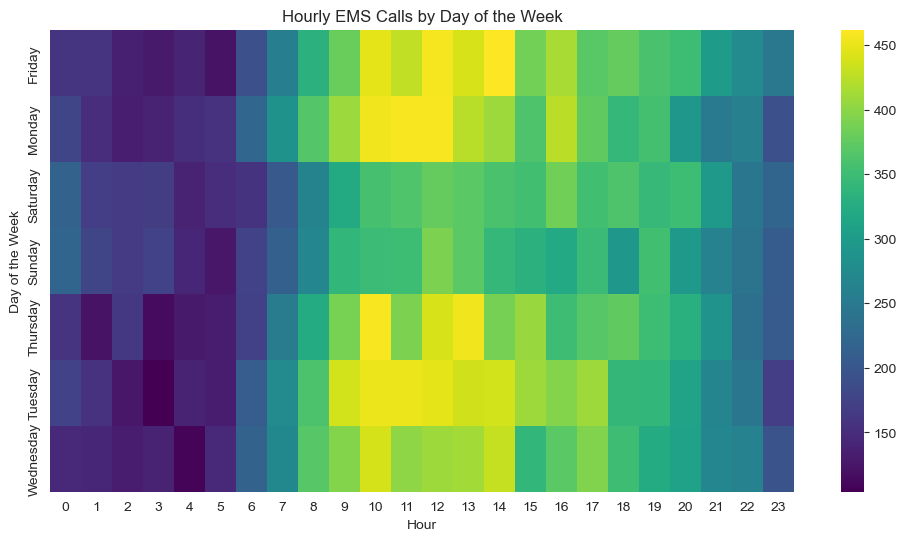

In [96]:
daytimetraf = df[df['reason'] == 'EMS'].groupby(by=['dayOfWeek','hour']).count()['reason'].unstack()
plt.figure(figsize=(12,6))
sns.heatmap(data=daytimetraf,cmap='viridis')
plt.xlabel('Hour')
plt.ylabel('Day of the Week')
plt.title('Hourly EMS Calls by Day of the Week')
plt.show()

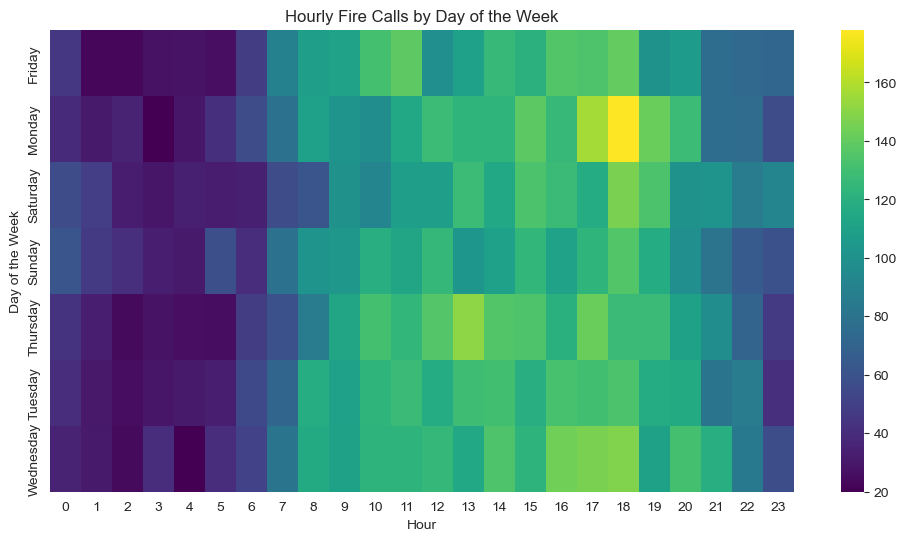

In [97]:
daytimetraf = df[df['reason'] == 'Fire'].groupby(by=['dayOfWeek','hour']).count()['reason'].unstack()
plt.figure(figsize=(12,6))
sns.heatmap(data=daytimetraf,cmap='viridis')
plt.xlabel('Hour')
plt.ylabel('Day of the Week')
plt.title('Hourly Fire Calls by Day of the Week')
plt.show()

____
Now a heatmap will be made to visualize the aggregated daily calls per month.

In [49]:
monthtime = df.groupby(by=['dayOfWeek','month']).count()['reason'].unstack()
monthtime

month,1,2,3,4,5,6,7,8,12
dayOfWeek,,,,,,,,,
Friday,1970,1581,1525,1958,1730,1649,2045,1310,1065
Monday,1727,1964,1535,1598,1779,1617,1692,1511,1257
Saturday,2291,1441,1266,1734,1444,1388,1695,1099,978
Sunday,1960,1229,1102,1488,1424,1333,1672,1021,907
Thursday,1584,1596,1900,1601,1590,2065,1646,1230,1266
Tuesday,1973,1753,1884,1430,1918,1676,1670,1612,1234
Wednesday,1700,1903,1889,1517,1538,2058,1717,1295,1262


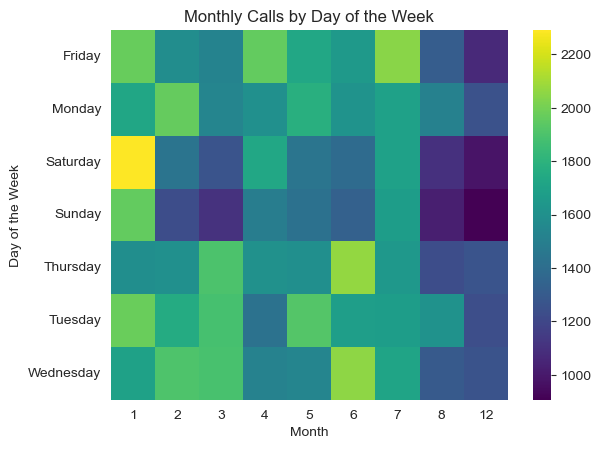

In [98]:
sns.heatmap(data = monthtime, cmap = 'viridis')
plt.xlabel('Month')
plt.ylabel('Day of the Week')
plt.title('Monthly Calls by Day of the Week')
plt.show()

____


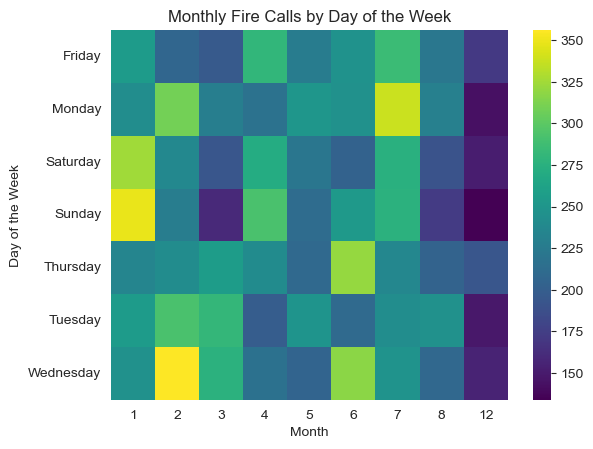

In [99]:
monthtime1 = df[df['reason'] == 'Fire'].groupby(by=['dayOfWeek','month']).count()['reason'].unstack()
sns.heatmap(data = monthtime1, cmap = 'viridis')
plt.xlabel('Month')
plt.ylabel('Day of the Week')
plt.title('Monthly Fire Calls by Day of the Week')
plt.show()

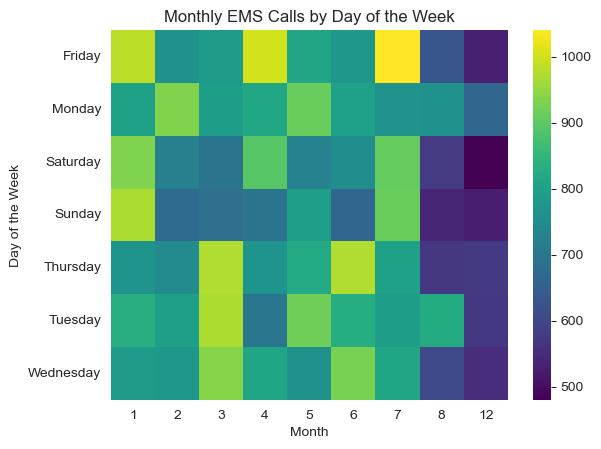

In [100]:
monthtime1 = df[df['reason'] == 'EMS'].groupby(by=['dayOfWeek','month']).count()['reason'].unstack()
sns.heatmap(data = monthtime1, cmap = 'viridis')
plt.xlabel('Month')
plt.ylabel('Day of the Week')
plt.title('Monthly EMS Calls by Day of the Week')
plt.show()

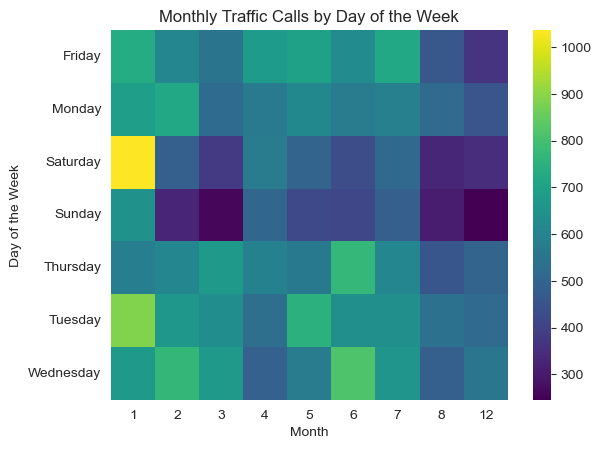

In [101]:
monthtime1 = df[df['reason'] == 'Traffic'].groupby(by=['dayOfWeek','month']).count()['reason'].unstack()
sns.heatmap(data = monthtime1, cmap = 'viridis')
plt.xlabel('Month')
plt.ylabel('Day of the Week')
plt.title('Monthly Traffic Calls by Day of the Week')
plt.show()